In [67]:
import sympy as sp
import numpy as np
import math as m
import matplotlib.pyplot as plt
a = 0.2
b = 3.1
al = 3/5
bet = 0

In [68]:
def F(x):
    return [2.5*m.cos(i*5.7)*m.exp(-4*i/3)+2.4*m.sin(2.5*i)*m.exp(-i) + 7 for i in x]
def Fnum(i):
    return 2.5*m.cos(i*5.7)*m.exp(-4*i/3)+2.4*m.sin(2.5*i)*m.exp(-i) + 7

In [69]:
Abs1 = 20.740810808510327267
Abs2 = 28.985795345020184134

In [70]:
# проверяем, есть ли на главной диагонали нули
def no0(M, k):
    n =  M.shape[0]
    while k < n and not M[k, k]:
        k += 1
    return k

In [71]:
#простой метод Гаусса
def Gauss(Ag,b):
        M = np.hstack((Ag, b)) # "склейка" матрицы коэффициентов при переменных и вектора свободных членов
        n = M.shape[0] 
        for k in range(n): 
            # убираем нули с главной диагонали, если они есть
            k0 = no0(M, k)
            if k0 != k:
                M[k0], M[k] = M[k].copy(), M[k0]   
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            # приямой ход метода Гаусса
            for r in range(k + 1, n):
                M[r, :] -= M[k, :] * M[r, k]
        #обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
        
        return  (M[:,n])


In [72]:
def Left():
    R = np.array([0])
    for i in range(50):
        xi = np.linspace(a,b,i+2)
        f = F(xi)
        ans = 0
        for j in range(len(xi)-1):
            ans +=(xi[j+1]-xi[j])*f[j]
        R = np.append(R,[abs(Abs1 - ans)])
        print(ans)
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    plt.plot(rx,R.T)
    plt.grid()

25.350836326394006
21.86752065261525
22.526531928392302
21.86127910417227
21.50002002982963
21.315567505974727
21.203832291054347
21.128645594585674
21.07449111489406
21.033588558435156
21.001590984806974
20.97587210966754
20.954748685156506
20.937090859770773
20.922111500179007
20.909245175848024
20.898075139576893
20.888287429916033
20.87964100809097
20.87194774450949
20.865058657886408
20.85885423865217
20.8532375080171
20.848128950514333
20.84346275523104
20.839183987603388
20.835246433617236
20.831610937012943
20.82824410279991
20.82511727628363
20.822205731650946
20.81948802160644
20.816945451973293
20.81456165412527
20.812322234645755
20.810214486423078
20.808227148975977
20.806350208496976
20.804574730145287
20.802892716682866
20.801296988752068
20.799781083027412
20.798339165205952
20.796965955374795
20.79565666375067
20.7944069351488
20.793212800828876
20.792070636600506
20.790977126259165
20.789929229578462


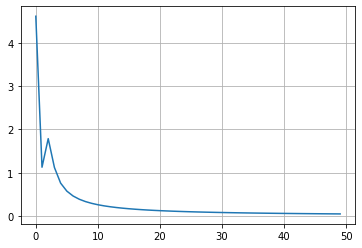

In [73]:
Left()

In [74]:
def mid():
    R = np.array([0])
    for i in range(50):
        xi = np.linspace(a,b,i+2)
        ans = 0
        for j in range(len(xi)-1):
            ans +=(xi[j+1]-xi[j])*Fnum((xi[j]+xi[j+1])/2)
        R = np.append(R,[abs(Abs1 - ans)])
        print(ans)
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    
    plt.plot(rx,R.T)
    plt.grid()

18.384204978836493
21.85503755572929
20.104603083557155
20.396012084999082
20.567157087040684
20.636176713360364
20.67034942848719
20.689844757110368
20.702083744938
20.710306930583826
20.716117492497357
20.720385791361124
20.723619290050266
20.726131014255124
20.728123052388245
20.72973086736485
20.73104816867365
20.73214154293013
20.733059408902992
20.733837688856255
20.734503508168412
20.735077672097418
20.735576362280487
20.736012322686687
20.736395703925872
20.736734674290155
20.73703586860443
20.73730472243164
20.737545724014065
20.7377626063691
20.737958495294954
20.738136024513754
20.738297426054807
20.738444601795898
20.738579180532014
20.738702563830746
20.73881596312894
20.738920429935654
20.739016880570528
20.73910611654111
20.739188841417697
20.739265674878627
20.73933716445617
20.739403795404435
20.739465999025033
20.739524159720556
20.739578620993488
20.7396296905674
20.739677644774122
20.739722732325106


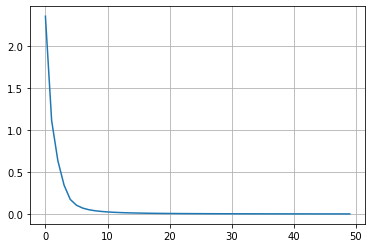

In [75]:
mid()

In [76]:
def Tr():    
    R = np.array([0])
    for i in range(50):
        xi = np.linspace(a,b,i+2)
        
        f = F(xi)
        ans = 0
        for j in range(len(xi)-1):
            ans +=(xi[j+1]-xi[j])*(f[j] + f[j+1])/2
        R = np.append(R,[abs(Abs1 - ans)])
        print(ans)
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    
    plt.plot(rx,R.T)
    plt.grid()

23.003500667229822
20.69385282303316
21.744086708670906
21.274445189381225
21.030552897996795
20.92434489611403
20.86849862545947
20.835228637190152
20.813676041653597
20.79885499251874
20.788196833973867
20.780260804737196
20.774184403682337
20.769424026973326
20.765622456234723
20.762536697150264
20.75999657139076
20.757879893295797
20.756097026029707
20.75458096155128
20.753280769354777
20.752157163235612
20.75117943587952
20.750323298049157
20.74956932886447
20.7489018468663
20.748308075870423
20.74777752061423
20.747301493863212
20.746872754311486
20.74648522651662
20.746133782257555
20.745814068362257
20.745522370032205
20.745255501526774
20.74501071811296
20.744785644674245
20.74457821746635
20.744386636320566
20.74420932520377
20.744044899504154
20.7438921387616
20.743749963830044
20.743617417666517
20.74349364910258
20.743377899080002
20.743269488931773
20.74316781036792
20.74307231688846
20.74298251639517


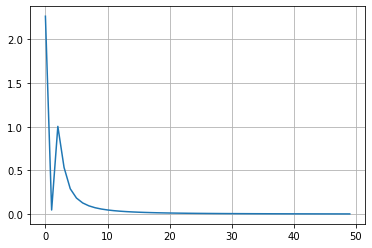

In [77]:
Tr()

In [78]:
def Sim():   
    R = np.array([0])
    for i in range(50):
        xi = np.linspace(a,b,i+2)
        ans = 0
        for j in range(len(xi)-1):
            ans +=(xi[j+1]-xi[j])*(4*Fnum((xi[j]+xi[j+1])/2)+Fnum(xi[j])+Fnum(xi[j+1]))/6
        R = np.append(R,[abs(Abs1 - ans)])
        print(ans)
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    plt.plot(rx,R.T)
    plt.grid()

19.923970208300936
21.467975978163913
20.651097625261738
20.688823119793128
20.721622357359387
20.73223277427825
20.736399160811285
20.738306050470296
20.739281177176533
20.7398229512288
20.740143939656193
20.740344129153147
20.740474327927622
20.740562018494522
20.74062285367041
20.74066614395999
20.740697636246026
20.74072099305202
20.740738614611896
20.740752113087925
20.740762595230535
20.74077083581015
20.7407773868135
20.740782647807507
20.740786912238743
20.740790398482208
20.740793271026426
20.74079565515916
20.740797647297114
20.740799322349897
20.74080073903551
20.740801943761692
20.74080297349062
20.740803857874663
20.7408046208636
20.740805281924818
20.740805856977374
20.74080635911255
20.740806799153876
20.740807186095324
20.740807527446517
20.74080782950628
20.740808097580786
20.740808336158462
20.74080854905089
20.74080873950704
20.740808910306253
20.740809063834238
20.740809202145567
20.740809327015118


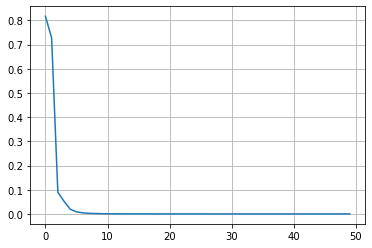

In [79]:
Sim()

In [80]:
def NK():    
    R = np.array([0])
    for i in range(50):
        ans = 0
        xi = np.linspace(a,b,i+2)
        for j in range(1,len(xi)):
            x2 = xi[j]
            x0 = xi[j-1]
            x1 = (x0+x2)/2
            mo0 = ((x2-a)**(-al+1)-(x0-a)**(-al+1))/(-al+1)
            mo1 = ((x2-a)**(-al+2)-(x0-a)**(-al+2))/(-al+2)+a*mo0
            mo2 = ((x2-a)**(-al+3)-(x0-a)**(-al+3))/(-al+3)+2*a*mo1-a**2*mo0
            X = np.array([[1,1,1],[x0,x1,x2],[x0**2,x1**2,x2**2]])
            Ai = np.array([[mo0,mo1,mo2]])
            A = Gauss(X,Ai.T)
            ans += A[0]*Fnum(x0)+A[1]*Fnum(x1)+A[2]*Fnum(x2)
        print(ans)
        R = np.append(R,[abs(Abs2 - ans)])
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    
    plt.plot(rx,R.T)
    plt.grid()
    return 

28.784164683388404
30.490384988267884
29.21062911694928
28.949444203433277
28.931881936793296
28.940961223263287
28.95167148142984
28.960197433481163
28.966471247931867
28.97101763725586
28.974327634820558
28.976765972042042
28.97858764984977
28.9799684086543
28.981029686347405
28.981856210333415
28.982507837679268
28.983027427394255
28.983446083942216
28.983786678276264
28.98406623841969
28.984297592512643
28.98449051237464
28.984652519407614
28.984789459454777
28.98490591764385
28.98500552108887
28.985091162099124
28.98516516441742
28.985229408200937
28.985285424824323
28.985334469400613
28.98537757670036
28.985415604597137
28.985449268062613
28.98547916594915
28.985505802225315
28.985529602916888
28.98555092970026
28.985570090870734
28.985587350238564
28.985602934381422
28.985617038584877
28.985629831730616
28.98564146033674
28.985652051910655
28.985661717743547
28.98567055524719
28.985678649917222
28.985686076985907


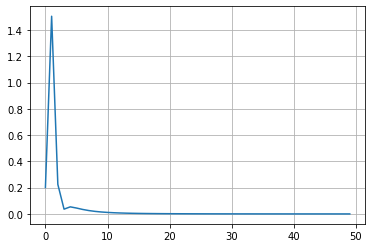

In [81]:
NK()

In [82]:
def Card(b,c,d):
    y1 = b/3
    q = (2*b**3/27 - b*c/3+d)/2
    p = (3*c-b**2)/9
    r = m.sqrt(abs(p))*np.sign(q)
    if p<0 and q**2+p**3<0:
        fi = m.acos(q/r**3)
        return [-2*r*m.cos(fi/3)-y1,2*r*m.cos(m.pi/3 - fi/3)-y1,2*r*m.cos(m.pi/3 + fi/3)-y1]


In [83]:
def G():   
    R = np.array([0])
    for i in range(50):
        ans = 0
        xi = np.linspace(a,b,i+2)
        for j in range(1,len(xi)):
            x2 = xi[j]
            x1 = xi[j-1]
            mo0 = ((x2-a)**(-al+1)-(x1-a)**(-al+1))/(-al+1)
            mo1 = ((x2-a)**(-al+2)-(x1-a)**(-al+2))/(-al+2)+a*mo0
            mo2 = ((x2-a)**(-al+3)-(x1-a)**(-al+3))/(-al+3)+2*a*mo1-a**2*mo0
            mo3 = ((x2-a)**(-al+4)-(x1-a)**(-al+4))/(-al+4)+3*a*mo2-3*a**2*mo1+a**3*mo0
            mo4 = ((x2-a)**(-al+5)-(x1-a)**(-al+5))/(-al+5)+4*a*mo3-6*a**2*mo2+a**3*4*mo1-a**4*mo0
            mo5 = ((x2-a)**(-al+6)-(x1-a)**(-al+6))/(-al+6)+5*a*mo4-10*a**2*mo3+10*a**3*mo2-a**4*5*mo1+a**5*mo0
            X = np.array([[mo0,mo1,mo2],[mo1,mo2,mo3],[mo2,mo3,mo4]])
            Ai = np.array([[-mo3,-mo4,-mo5]])
            ai = Gauss(X,Ai.T)
            #x = np.roots([1,ai[2],ai[1],ai[0]])
            x = Card(ai[2],ai[1],ai[0])
            x = np.sort(x)
            Xd = np.array([[1,1,1],[x[0],x[1],x[2]],[x[0]**2,x[1]**2,x[2]**2]])
            M = np.array([[mo0,mo1,mo2]])
            A = Gauss(Xd,M.T)
            ans+=A[0]*Fnum(x[0])+A[1]*Fnum(x[1])+A[2]*Fnum(x[2])
        print(ans)
        R = np.append(R,[abs(Abs2 - ans)])
    R=np.delete(R,0,axis=0)
    rx = np.array([[i] for i in range(50)])
    plt.plot(rx,R.T)
    plt.grid()
    return ans

27.932487530664563
29.207604210460897
28.989733795893134
28.982851194005246
28.98465171636738
28.985351688683078
28.985606223447874
28.985706996432256
28.985750712221332
28.985771269433773
28.985781624134617
28.9857871531396
28.985790256096024
28.98579207365027
28.985793178552466
28.985793872358542
28.98579432065338
28.985794617704197
28.985794819110886
28.98579495841137
28.98579505654962
28.98579512680976
28.985795177914767
28.985795215626915
28.9857952437377
28.9857952650115
28.98579528124208
28.98579529374107
28.98579530347995
28.985795311153616
28.985795317187513
28.98579532205269
28.985795325881245
28.98579532904709
28.985795331632936
28.985795333730035
28.985795335396027
28.985795336850703
28.985795338034688
28.985795339041424
28.985795339826165
28.985795340540932
28.98579534113739
28.98579534158588
28.985795341943238
28.985795342362966
28.985795342750908
28.985795343033704
28.98579534327995
28.98579534343938


28.98579534343938

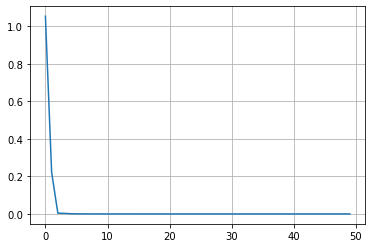

In [84]:
G()

In [85]:
def NK_1(i):    
    ans = 0
    xi = np.linspace(a,b,i+1)
    for j in range(1,len(xi)):
        x2 = xi[j]
        x0 = xi[j-1]
        x1 = (x0+x2)/2
        mo0 = ((x2-a)**(-al+1)-(x0-a)**(-al+1))/(-al+1)
        mo1 = ((x2-a)**(-al+2)-(x0-a)**(-al+2))/(-al+2)+a*mo0
        mo2 = ((x2-a)**(-al+3)-(x0-a)**(-al+3))/(-al+3)+2*a*mo1-a**2*mo0
        X = np.array([[1,1,1],[x0,x1,x2],[x0**2,x1**2,x2**2]])
        Ai = np.array([[mo0,mo1,mo2]])
        A = Gauss(X,Ai.T)
        ans += A[0]*Fnum(x0)+A[1]*Fnum(x1)+A[2]*Fnum(x2)
    return ans

In [90]:
d = b-a
eps = 10**(-6)
for r in range(2,16):
    Sh = np.zeros((r+1,1))
    H = np.zeros((r+1,r+1))
    for j in range(r+1):
        Sh[j,0] = -NK_1(2**j)
    mm = -m.log(abs((-Sh[-1,0]+Sh[-2,0])/(-Sh[-2,0]+Sh[-3,0])))/m.log(2)
    
    H[:,0] = np.ones((r+1,1))[:,0]
    for j in range(r+1):
        H[j,1:] = np.array([(d/2**j)**(mm+i) for i in range(r)])
    Ans = Gauss(H,Sh)
    print(Ans[0] - Sh[r,0],mm,d/2**r)
    if abs(Ans[0] - Sh[r,0]) < eps: break
    if r == 2: 
        hopt=d*(eps/abs(Ans[0] - Sh[1,0]))**(1/mm)
print(hopt)

40.562151178033304 0.14699251440066904 0.725
-0.0001989499362835545 7.162897532245035 0.3625
1125.09055932798 -1.0101816904913539 0.18125
-0.0005182576814704021 2.6385144747881863 0.090625
-5.2058004975208405e-05 3.0772009206353355 0.0453125
-5.0951772259111294e-06 3.2332414586039326 0.02265625
-4.938089759320974e-07 3.3041060360267185 0.011328125
3.9235134566304275e-52


In [91]:
def G1(i):  
    ans=0
    xi = np.linspace(a,b,i+1)
    for j in range(1,len(xi)):            
        x2 = xi[j]
        x1 = xi[j-1]
        mo0 = ((x2-a)**(-al+1)-(x1-a)**(-al+1))/(-al+1)
        mo1 = ((x2-a)**(-al+2)-(x1-a)**(-al+2))/(-al+2)+a*mo0
        mo2 = ((x2-a)**(-al+3)-(x1-a)**(-al+3))/(-al+3)+2*a*mo1-a**2*mo0
        mo3 = ((x2-a)**(-al+4)-(x1-a)**(-al+4))/(-al+4)+3*a*mo2-3*a**2*mo1+a**3*mo0
        mo4 = ((x2-a)**(-al+5)-(x1-a)**(-al+5))/(-al+5)+4*a*mo3-6*a**2*mo2+a**3*4*mo1-a**4*mo0
        mo5 = ((x2-a)**(-al+6)-(x1-a)**(-al+6))/(-al+6)+5*a*mo4-10*a**2*mo3+10*a**3*mo2-a**4*5*mo1+a**5*mo0
        X = np.array([[mo0,mo1,mo2],[mo1,mo2,mo3],[mo2,mo3,mo4]])
        Ai = np.array([[-mo3,-mo4,-mo5]])
        ai = Gauss(X,Ai.T)
        #x = np.roots([1,ai[2],ai[1],ai[0]])
        x = Card(ai[2],ai[1],ai[0])
        #x = np.sort(x)
        Xd = np.array([[1,1,1],[x[0],x[1],x[2]],[x[0]**2,x[1]**2,x[2]**2]])
        M = np.array([[mo0,mo1,mo2]])
        A = Gauss(Xd,M.T)
        ans+=A[0]*Fnum(x[0])+A[1]*Fnum(x[1])+A[2]*Fnum(x[2])
    return ans

In [92]:
d = b-a
for r in range(2,10):
    Sh = np.zeros((r+1,1))
    H = np.zeros((r+1,r+1))
    for j in range(r+1):
        Sh[j,0] = -G1(2**j)
    mm = -m.log(abs((-Sh[-1,0]+Sh[-2,0])/(-Sh[-2,0]+Sh[-3,0])))/m.log(2)
    H[:,0] = np.ones((r+1,1))[:,0]
    for j in range(r+1):
        H[j,1:] = np.array([(d/2**j)**(mm+i) for i in range(r)])
    Ans = Gauss(H,Sh)
    print(Ans[0] - Sh[r,0],mm,d/2**r)
    if r == 2: 
        hoptg=d*(eps/abs(Ans[0] - Sh[1,0]))**(1/mm)
    if abs(Ans[0] - Sh[r,0]) < eps: break
print(hoptg)

0.10083165433653463 2.504216883526916 0.725
-9.726913470586851e-05 6.29830049549923 0.3625
-5.287695472588894e-07 5.038795907853546 0.18125
0.018240870367620315


In [93]:
def G1(l):  
    ans=0
    ii = 0
    while a+l*ii < b:
        x1 = a+l*ii
        if a+l*(ii+1) <= b: x2 = a+l*(ii+1)
        else: x2 = b
        
        mo0 = ((x2-a)**(-al+1)-(x1-a)**(-al+1))/(-al+1)
        mo1 = ((x2-a)**(-al+2)-(x1-a)**(-al+2))/(-al+2)+a*mo0
        mo2 = ((x2-a)**(-al+3)-(x1-a)**(-al+3))/(-al+3)+2*a*mo1-a**2*mo0
        mo3 = ((x2-a)**(-al+4)-(x1-a)**(-al+4))/(-al+4)+3*a*mo2-3*a**2*mo1+a**3*mo0
        mo4 = ((x2-a)**(-al+5)-(x1-a)**(-al+5))/(-al+5)+4*a*mo3-6*a**2*mo2+a**3*4*mo1-a**4*mo0
        mo5 = ((x2-a)**(-al+6)-(x1-a)**(-al+6))/(-al+6)+5*a*mo4-10*a**2*mo3+10*a**3*mo2-a**4*5*mo1+a**5*mo0
        X = np.array([[mo0,mo1,mo2],[mo1,mo2,mo3],[mo2,mo3,mo4]])
        Ai = np.array([[-mo3,-mo4,-mo5]])
        ai = Gauss(X,Ai.T)
        
        x = Card(ai[2],ai[1],ai[0])
        #x = np.sort(x)
      
        Xd = np.array([[1,1,1],[x[0],x[1],x[2]],[x[0]**2,x[1]**2,x[2]**2]])
        M = np.array([[mo0,mo1,mo2]])
        A = Gauss(Xd,M.T)
        ans+=A[0]*Fnum(x[0])+A[1]*Fnum(x[1])+A[2]*Fnum(x[2])
        ii+=1
    return ans

In [97]:
for r in range(2,5):
    Sh = np.zeros((r+1,1))
    H = np.zeros((r+1,r+1))
    for j in range(r+1):
        Sh[j,0] = -G1(hoptg/2**j)
       
    
    if r == 1: mm = 2.5
    else: mm = -m.log(abs((-Sh[-1,0]+Sh[-2,0])/(-Sh[-2,0]+Sh[-3,0])))/m.log(2)
    H[:,0] = np.ones((r+1,1))[:,0]
    for j in range(r+1):
        H[j,1:] = np.array([(d/2**j)**(mm+i) for i in range(r)])
    Ans = Gauss(H,Sh)
    print(Ans[0] - Sh[r-1,0],mm)
    if abs(Ans[0] - Sh[r-1,0]) < eps: break

1.6352075249415066e-10 -52.211084256586894
